



- Simon Londono Aguirre 



# Criterios de Aceptación

1. **(30%)** Análisis descriptivo de los datos. Realice:
    - Una descripción de cada variable del conjunto de datos.
    - Un recuento de variables nulas en los datos.
    - Un histograma de frecuencias de cada variable.
    - Un gráfico de barras comparando cada variable con la variable objetivo.
    - Un gráfico de mapa de calor de la correlación de los datos.
2. **(30%)** Realice un modelo de árbol de decisión regresor.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree variables Dummy para las variables categóricas.
    - Cree y entrene un modelo de árbol de decisión regresor.
    - Entrene hiperparámetros para ajustar el modelo.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
3. **(30%)** Realice un modelo de regresión lineal.
    - Estandarize las variables numéricas utilizando la técnica `Z-Score`.
    - Cree variables Dummy para las variables categóricas.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree y entrene un modelo de regresión lineal múltiple.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
4. **(10%)** De acuerdo a los resultados de los modelos, argumente cuál es el mejor.





Este dataset contiene información de venta de apartamentos de los últimos 10 años para un distrito específico en una ciudad.

In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [392]:
df = pd.read_csv('Daegu_Real_Estate_data.csv')

In [393]:
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [394]:
df.info
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


# Solucion

## Punto numero 1

## 1.

**SalePrice**: El precio de venta de la propiedad en cuestión.

**YearBuilt**: El año en que se construyó la propiedad.

**YrSold**: El año en que se vendió la propiedad.

**MonthSold**: El mes en que se vendió la propiedad.

**Size(sqf)**: El tamaño de la propiedad en pies cuadrados (square feet).

**Floor**: El piso en el que se encuentra la propiedad.

**HallwayType**: El tipo de pasillo en la propiedad.

**HeatingType**: El tipo de sistema de calefacción en la propiedad.

**AptManageType**: El tipo de administración del apartamento.

**N_Parkinglot(Ground)**: El número de estacionamientos en el terreno (en el suelo).

**N_Parkinglot(Basement)**: El número de estacionamientos en el sótano.

**TimeToBusStop**: Tiempo hasta la parada de autobús más cercana.

**TimeToSubway**: Tiempo hasta la estación de metro más cercana.

**N_APT**: Número total de unidades de apartamentos en el edificio.

**N_manager**: Número de gerentes de administración en el edificio.

**N_elevators**: Número de ascensores en el edificio.

**SubwayStation**: Nombre de la estación de metro más cercana.

**N_FacilitiesNearBy(PublicOffice)**: Número de oficinas públicas cercanas a la propiedad.

**N_FacilitiesNearBy(Hospital)**: Número de hospitales cercanos a la propiedad.

**N_FacilitiesNearBy(Dpartmentstore)**: Número de grandes almacenes cercanos a la propiedad.

**N_FacilitiesNearBy(Mall)**: Número de centros comerciales cercanos a la propiedad.

**N_FacilitiesNearBy(ETC)**: Número de instalaciones (como áreas de servicio) cercanas a la propiedad.

**N_FacilitiesNearBy(Park)**: Número de parques cercanos a la propiedad.

**N_SchoolNearBy(Elementary)**: Número de escuelas primarias cercanas a la propiedad.

**N_SchoolNearBy(Middle)**: Número de escuelas intermedias cercanas a la propiedad.

**N_SchoolNearBy(High)**: Número de escuelas secundarias cercanas a la propiedad.

**N_SchoolNearBy(University)**: Número de universidades cercanas a la propiedad.

**N_FacilitiesInApt**: Número de instalaciones dentro del complejo de apartamentos.

**N_FacilitiesNearBy(Total)**: Número total de instalaciones cercanas a la propiedad.

**N_SchoolNearBy(Total)**: Número total de escuelas cercanas a la propiedad.

## 2.


In [395]:
df.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


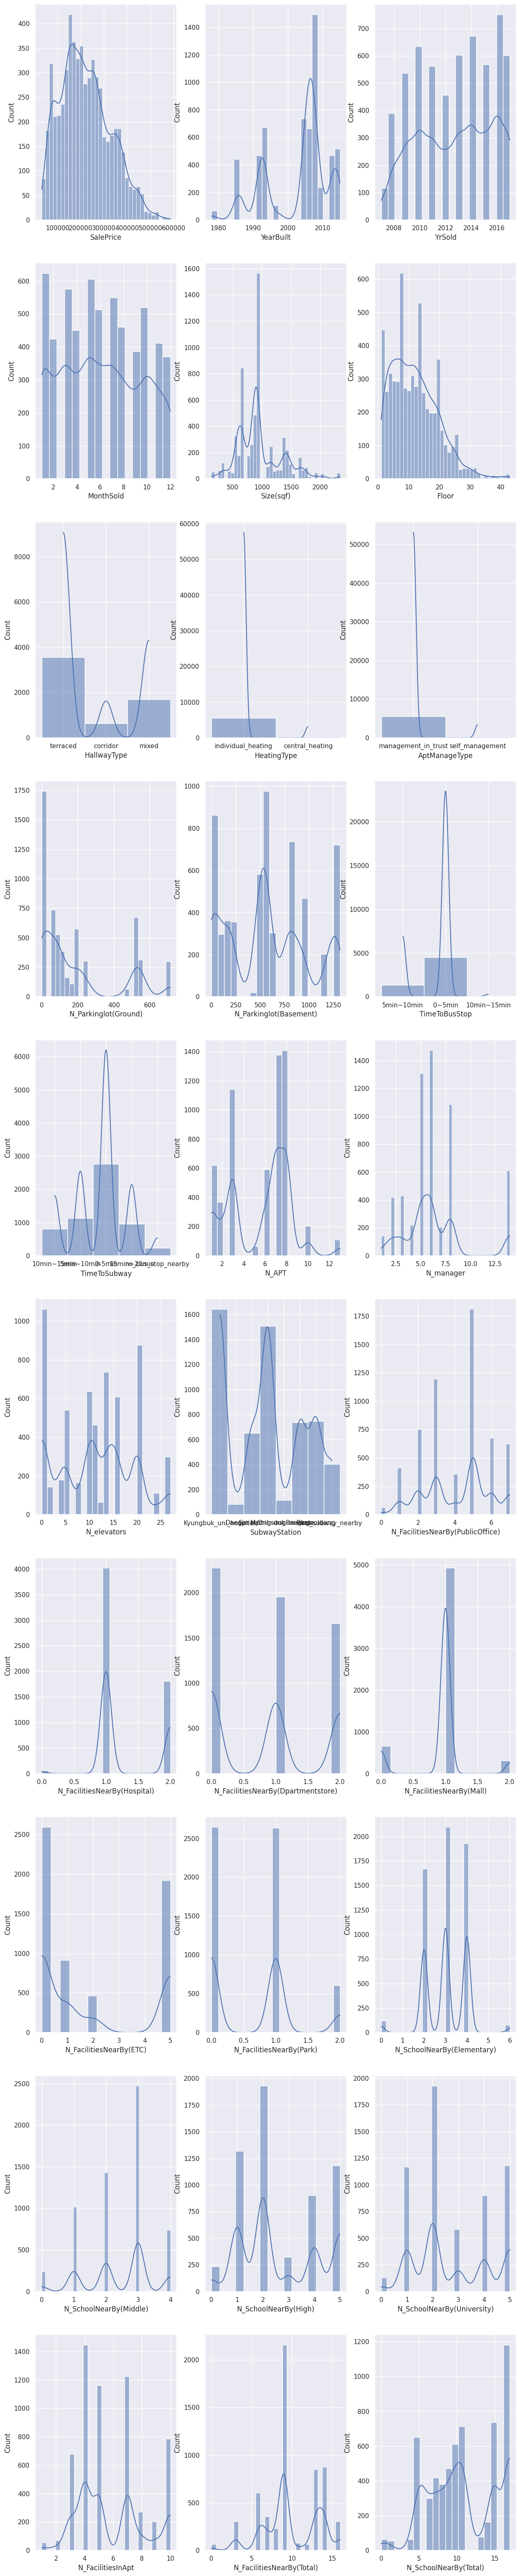

In [396]:
import seaborn as sns

sns.set()
fig = plt.figure(figsize = [15,80])
cols = ['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor', 'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)',
        'TimeToBusStop', 'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators', 'SubwayStation', 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
        'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
        'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
cnt = 1
for col in cols :
    plt.subplot(10,3 ,cnt)
    sns.histplot(df[col], kde = True)
    cnt+=1
plt.show()

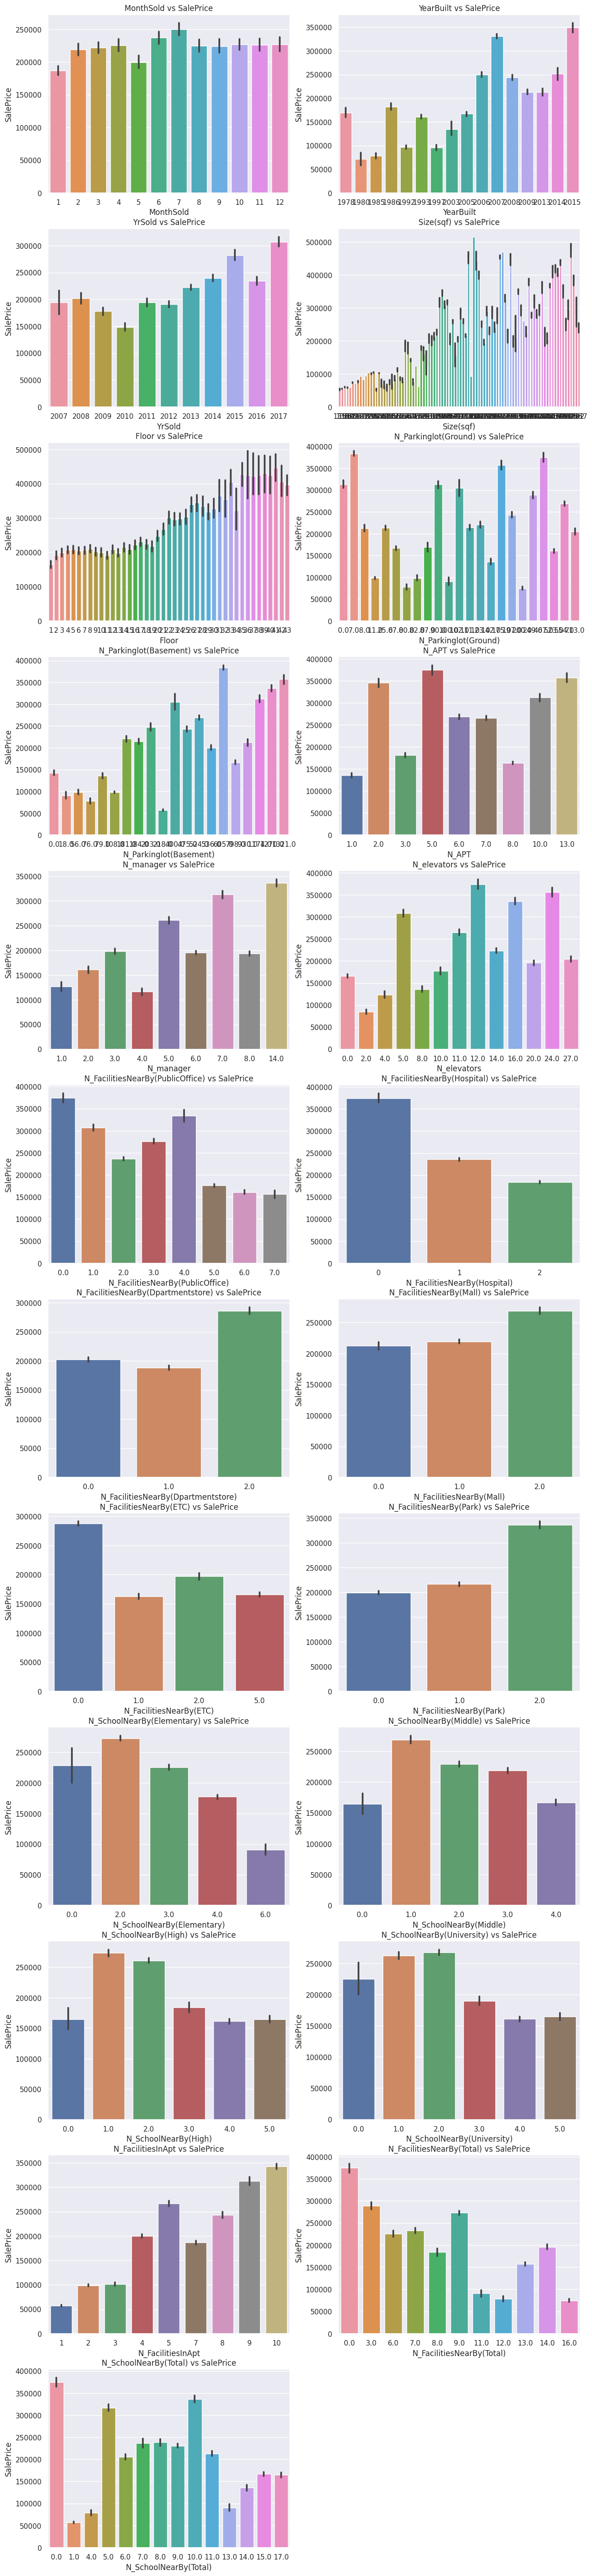

In [397]:
#Separar las variables discretas de las categoricas

fig = plt.figure(figsize = [15,90])
cols = [ 'MonthSold', 'YearBuilt', 'YrSold', 'Size(sqf)', 'Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_APT', 'N_manager', 'N_elevators',
    'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
    'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
    'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)',
    'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
    'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']


cnt = 1
for col in cols :
    plt.subplot(15,2,cnt)
    sns.barplot(data = df, x = col , y = 'SalePrice').set(title='{0} vs SalePrice'.format(col))
    cnt+=1
plt.show()

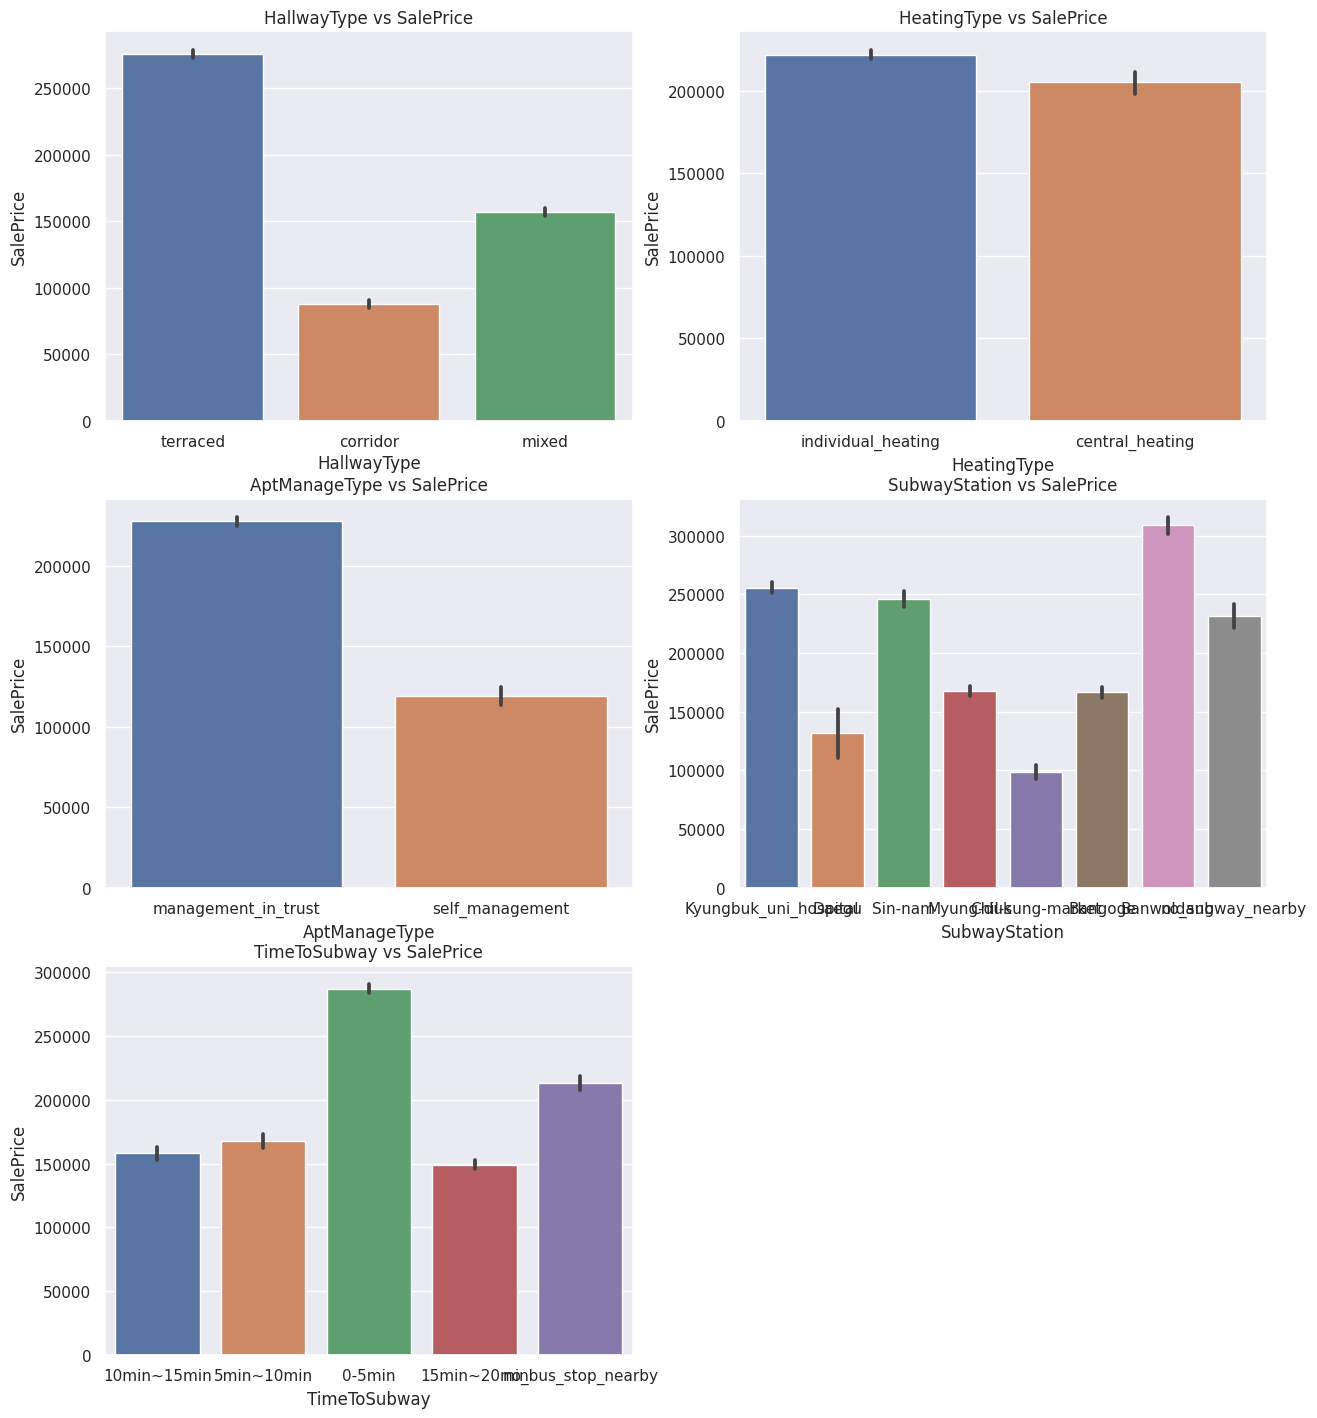

In [398]:
fig = plt.figure(figsize = [15,90])
cols = ['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation', 'TimeToSubway']


cnt = 1
for col in cols :
    plt.subplot(15,2,cnt)
    sns.barplot(data = df, x = col , y = 'SalePrice').set(title='{0} vs SalePrice'.format(col))
    cnt+=1
plt.show()

<ipython-input-399-7cd9ea20140f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'Blues', center = 0)


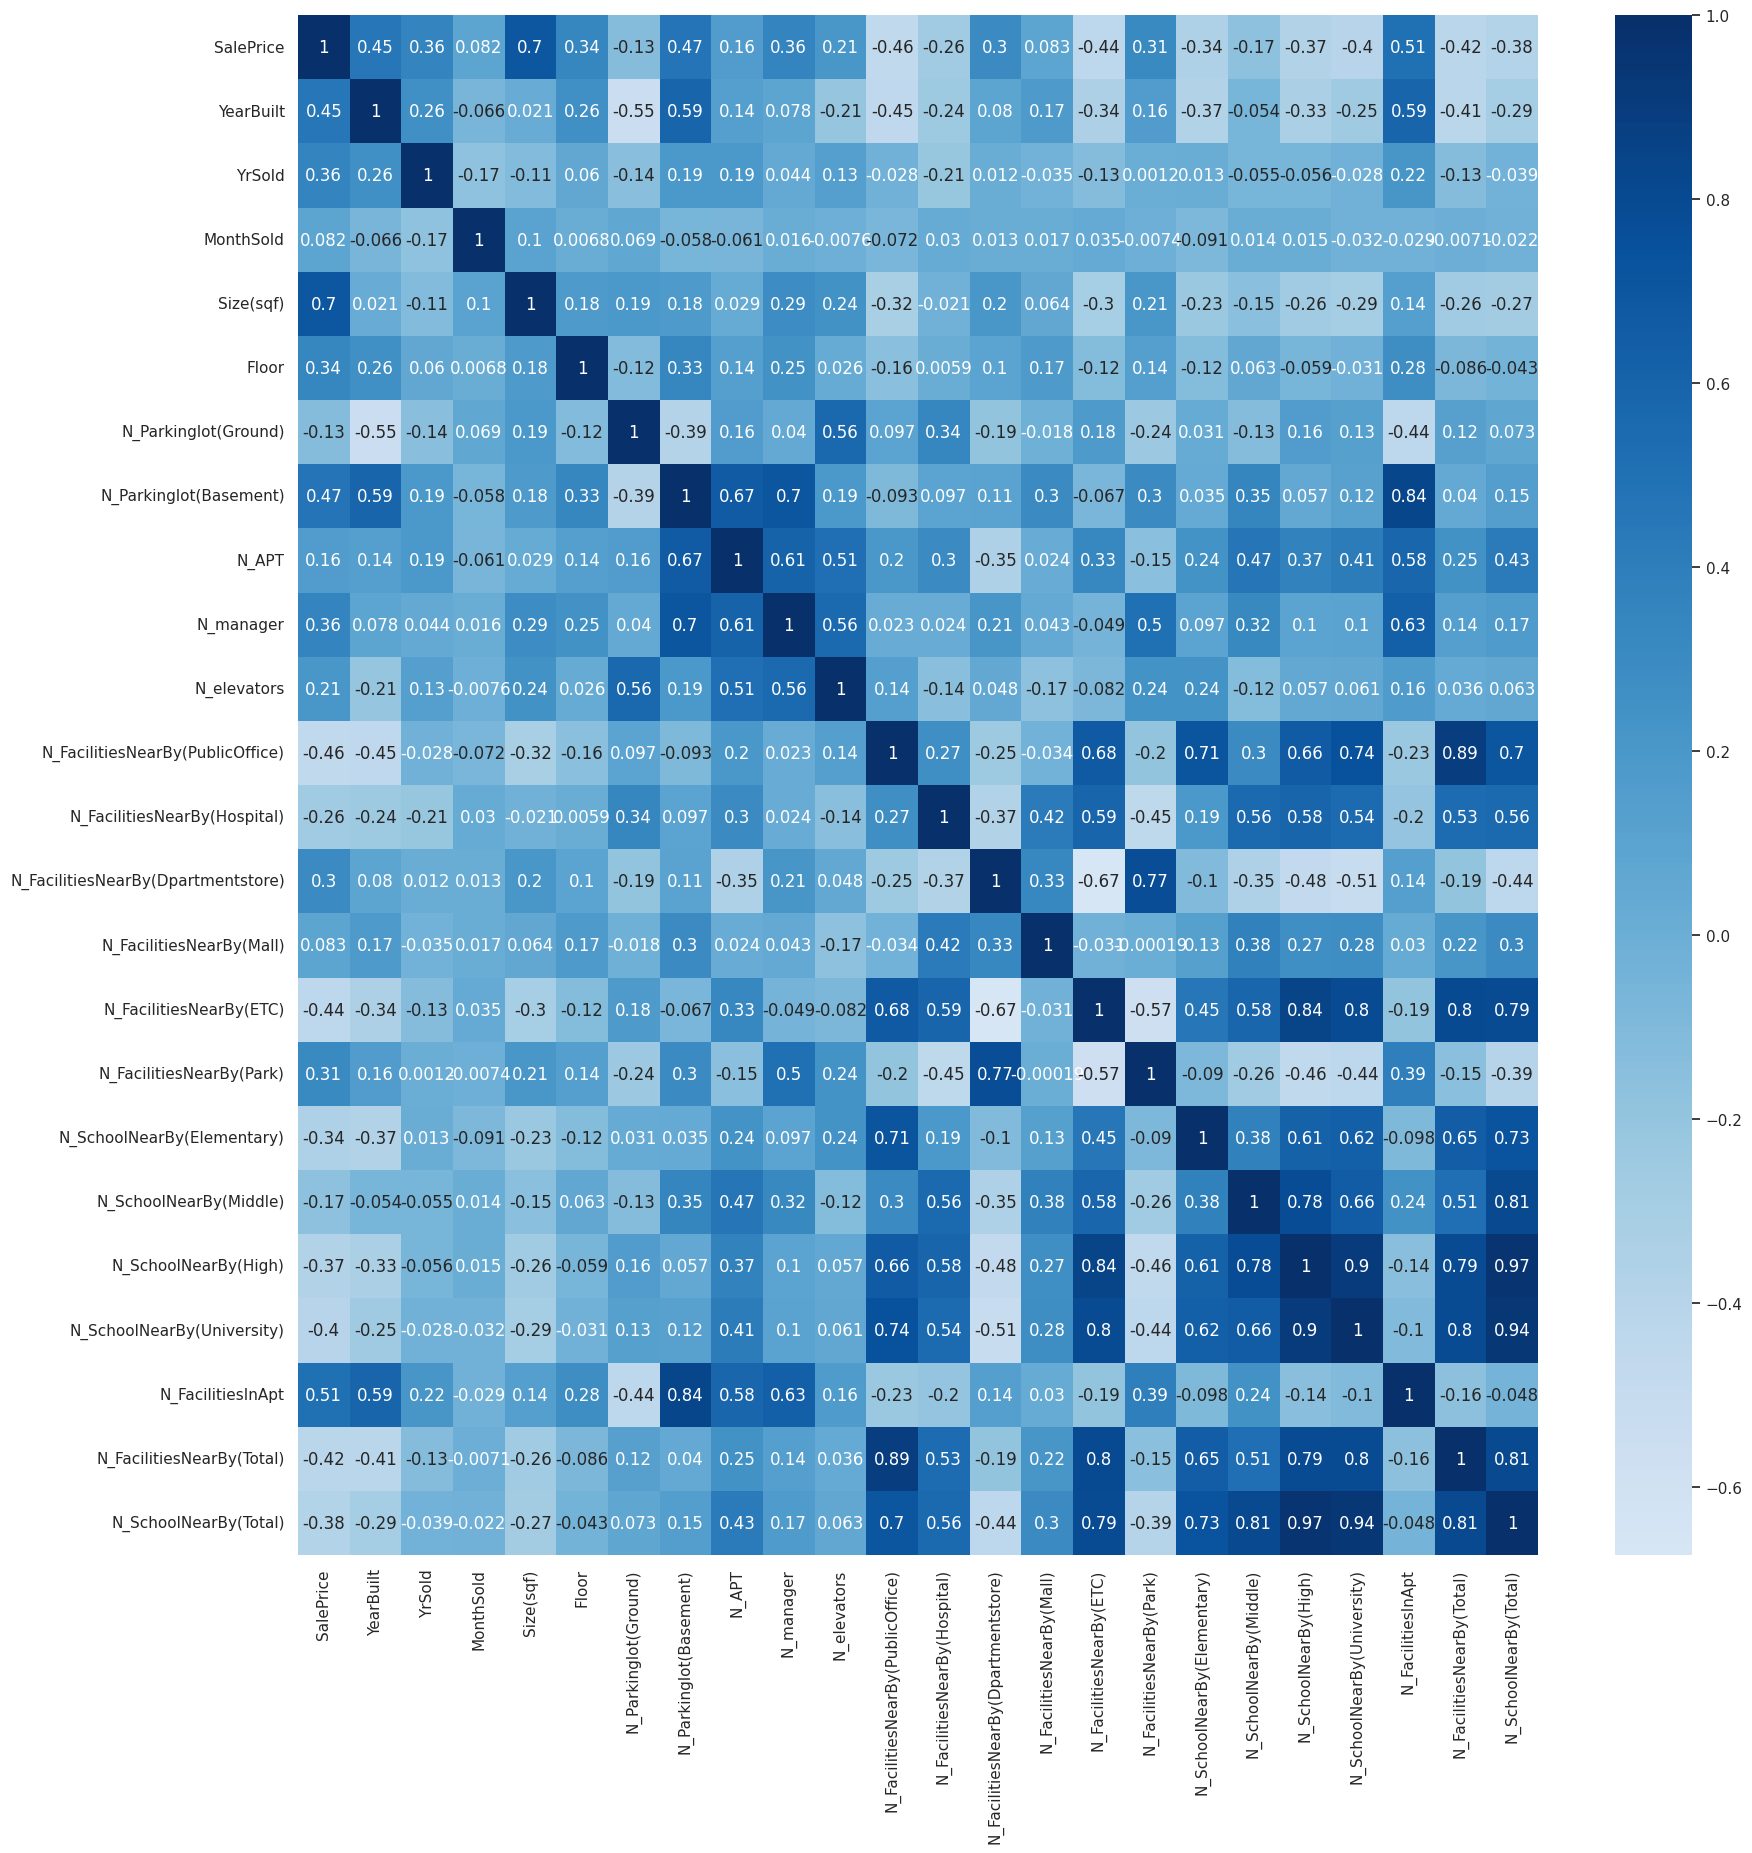

In [399]:
fig = plt.figure(figsize = [20,20])
sns.heatmap(df.corr(),annot = True, cmap = 'Blues', center = 0)
plt.show()

# Punto 2
Realice un modelo de árbol de decisión regresor.

In [400]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from math import sqrt

In [401]:
data = pd.get_dummies(df, columns=['HallwayType', 'HeatingType', 'AptManageType', 'SubwayStation','TimeToBusStop', 'TimeToSubway'])
data

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,141592,2006,2007,8,814,3,111.0,184.0,3.0,3.0,...,0,0,0,0,1,0,1,0,0,0
1,51327,1985,2007,8,587,8,80.0,76.0,1.0,2.0,...,0,0,1,0,0,0,0,0,1,0
2,48672,1985,2007,8,587,6,80.0,76.0,1.0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,380530,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,...,1,0,1,0,0,1,0,0,0,0
4,221238,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,0.0,1270.0,7.0,14.0,...,0,0,1,0,0,1,0,0,0,0
5887,298230,2006,2017,8,903,13,123.0,181.0,3.0,3.0,...,0,0,0,0,1,1,0,0,0,0
5888,357522,2007,2017,8,868,20,0.0,1270.0,7.0,14.0,...,0,0,1,0,0,1,0,0,0,0
5889,312389,1978,2017,8,1327,1,87.0,0.0,2.0,1.0,...,0,0,1,0,0,1,0,0,0,0


In [402]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [403]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

np.random.seed(10013)
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2_score = regressor.score(x_test, y_test)
print("R2 Score:", r2_score)
print("MSE:", mse)
print("RMSE:", rmse)


R2 Score: 0.9624863900996959
MSE: 395122611.8389269
RMSE: 19877.691310585516


In [404]:
from sklearn.tree import plot_tree

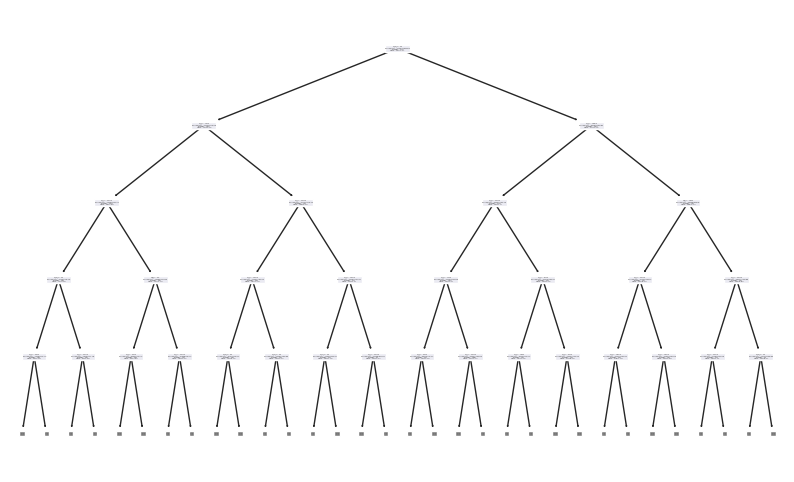

In [405]:
plt.figure(figsize = [10,6])
plot_tree(regressor, max_depth=4)
plt.show()

In [406]:
from sklearn.model_selection import GridSearchCV

# Punto con hiperparametros

In [407]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 6],
    'min_samples_leaf': [1, 2, 3]
}

In [408]:
np.random.seed(10013)
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params_ = grid_search.best_params_

best_regressor_ = DecisionTreeRegressor(max_depth=best_params_['max_depth'], min_samples_split=best_params_['min_samples_split'], min_samples_leaf=best_params_['min_samples_leaf'])
best_regressor_.fit(x_train, y_train)

r2_score_best = best_regressor_.score(x_test, y_test)

print("R2 Score with Best Model:", r2_score_best)








R2 Score with Best Model: 0.9687137990118042


In [409]:
y_pred_best = best_regressor_.predict(x_test)
print("Best Parameters:", best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [410]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 395122611.8389269


# Punto 3
Realice un modelo de regresión lineal.


In [411]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [412]:
def z_score(column):
    return (column - column.mean()) / column.std()

columnas_numericas = df.select_dtypes(include=[np.number]).columns
df[columnas_numericas] = df[columnas_numericas].apply(z_score)

df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,-0.748477,0.344152,-1.958901,0.543061,-0.370150,-1.195737,terraced,individual_heating,management_in_trust,-0.388310,...,0.145915,-0.427578,-0.993769,-0.023473,-0.402502,-0.423711,-0.513484,-0.347322,-1.121873,-0.420005
1,-1.596958,-2.039021,-1.958901,0.543061,-0.963670,-0.533375,corridor,individual_heating,self_management,-0.530124,...,0.145915,0.026680,0.525248,-1.071060,-1.365987,-1.066367,-1.856407,-1.205395,0.617097,-1.546509
2,-1.621915,-2.039021,-1.958901,0.543061,-0.963670,-0.798320,corridor,individual_heating,self_management,-0.530124,...,0.145915,0.026680,0.525248,-1.071060,-1.365987,-1.066367,-1.856407,-1.205395,0.617097,-1.546509
3,1.497515,0.344152,-1.958901,0.543061,2.877214,-0.533375,terraced,individual_heating,management_in_trust,0.242988,...,0.145915,-0.881836,-0.993769,-1.071060,-0.402502,-1.066367,-0.513484,-0.347322,-1.991358,-0.870607
4,0.000187,-1.131146,-1.958901,0.543061,2.105899,-1.195737,mixed,individual_heating,management_in_trust,1.496435,...,0.145915,1.389455,-0.993769,1.024114,0.560984,1.504260,1.500900,-0.776359,1.196753,1.382400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,2.728656,0.457636,1.482861,0.543061,1.797374,0.923821,terraced,individual_heating,management_in_trust,-0.896094,...,0.145915,-0.881836,2.044265,-0.023473,0.560984,-0.423711,-0.513484,1.797860,-0.252388,-0.194705
5887,0.723904,0.344152,1.482861,0.543061,-0.137449,0.128987,terraced,individual_heating,management_in_trust,-0.333415,...,0.145915,0.026680,-0.993769,1.024114,0.560984,0.218946,-1.184945,-0.776359,-0.542216,0.030596
5888,1.281242,0.457636,1.482861,0.543061,-0.228961,1.056294,terraced,individual_heating,management_in_trust,-0.896094,...,0.145915,-0.881836,2.044265,-0.023473,0.560984,-0.423711,-0.513484,1.797860,-0.252388,-0.194705
5889,0.856997,-2.833412,1.482861,0.543061,0.971152,-1.460682,corridor,individual_heating,self_management,-0.498101,...,0.145915,-0.881836,-0.993769,-0.023473,0.560984,0.218946,-0.513484,-1.205395,-0.832045,0.030596


In [413]:
x = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [414]:
x = pd.get_dummies(x)
x.tail(10)

,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
5881,2007,2017,8,1928,20,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0
5882,2007,2017,8,1928,24,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0
5883,2006,2017,8,857,8,123.0,181.0,3.0,3.0,11.0,...,0,0,0,0,1,1,0,0,0,0
5884,2015,2017,8,644,22,102.0,400.0,6.0,5.0,10.0,...,0,0,1,0,0,0,0,0,1,0
5885,2007,2017,8,1643,4,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0
5886,2007,2017,8,1643,19,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0
5887,2006,2017,8,903,13,123.0,181.0,3.0,3.0,11.0,...,0,0,0,0,1,1,0,0,0,0
5888,2007,2017,8,868,20,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0
5889,1978,2017,8,1327,1,87.0,0.0,2.0,1.0,4.0,...,0,0,1,0,0,1,0,0,0,0
5890,2007,2017,8,868,13,0.0,1270.0,7.0,14.0,16.0,...,0,0,1,0,0,1,0,0,0,0


In [415]:
x.columns.tolist()

['YearBuilt',
 'YrSold',
 'MonthSold',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_APT',
 'N_manager',
 'N_elevators',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Mall)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(Park)',
 'N_SchoolNearBy(Elementary)',
 'N_SchoolNearBy(Middle)',
 'N_SchoolNearBy(High)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)',
 'HallwayType_corridor',
 'HallwayType_mixed',
 'HallwayType_terraced',
 'HeatingType_central_heating',
 'HeatingType_individual_heating',
 'AptManageType_management_in_trust',
 'AptManageType_self_management',
 'SubwayStation_Bangoge',
 'SubwayStation_Banwoldang',
 'SubwayStation_Chil-sung-market',
 'SubwayStation_Daegu',
 'SubwayStation_Kyungbuk_uni_hospital',
 'SubwayStation_Myung-duk',
 'SubwayStation_Sin-nam',
 'SubwayStation_no_subway_nearby',
 'Ti

In [416]:
np.random.seed(10013)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [417]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.coef_

array([   5328.12307278,   12746.03300596,    2069.85048789,
           140.59633239,    1214.2117067 ,    -270.07783666,
          -238.37581222,   26034.89195702,   19034.10111469,
         -3486.66420821,  -31109.62424128,   58310.87279824,
         41517.59789937,  -12688.15793789,   -5584.29136394,
        -32266.08551886,   27609.22267715,  -67971.37215656,
         50282.31026879,  -18176.9771736 ,   10450.72363323,
         18180.31163563,   -8256.81638423,  -21964.70284883,
         18431.6067193 ,    3533.09612953,    9064.49566996,
         -9064.49566996,  -52142.49918141,   52142.49918141,
         31248.3993944 ,    6624.45413022,  -24849.18516628,
        -21556.59553616,  -67898.13331032,  -11570.68235267,
         66062.47766585,   21939.26517496,   49101.8893473 ,
        -38322.009728  ,  -10779.8796193 ,   47602.76564601,
         71613.55124848,  -12816.7926751 , -107127.82036377,
           728.29614439])

In [419]:
lr_model.intercept_

-36384093.211690195

In [420]:
lr_model.score(x_train, y_train)

0.8847885579429082

In [421]:
y_pred = lr_model.predict(x_test)
y_pred

array([244826.75139929, 263377.95254013, 219625.51238548, ...,
       359102.75531891, 391024.45278987, 177225.37007562])

In [422]:
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 1302975436.6875038
RMSE: 36096.75105445785
R2 Score: 0.8700202458114531


# Punto 4
**(10%)** De acuerdo a los resultados de los modelos, argumente cuál es el mejor.


Vemos que con el arbol de descion tenemos un score del 96% y con hiperparametros podemos subirlo a 97%, mientras que con la regresion lineal, obtenemos un 87%

Todo esto con la semilla 10013

Podemos, entonces, afirmar que el mejor modelo para este ejercicio corresponde al arbol de decisión por haber obtenido un score mayor, esto se puede explicar  debido a la poca relacion lienal que tienen los datos con la variable objetivo

